In [1211]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import numpy as np
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
x1 = 0 #0->3 for 00,01,10,11
x2 = 0
x3 = 0

qc = QuantumCircuit(1)
qc.u(x1*np.pi/2,-np.pi/2,np.pi/2,0)
qc.u(x2*np.pi/2,-np.pi/2,np.pi/2,0)
qc.u(x3*np.pi/2,-np.pi/2,np.pi/2,0)
print(qc.draw())

output = Statevector.from_instruction(qc).to_dict()
p0,p1 = 0,0
if '0' in output.keys():
    p0 = np.round(np.abs(output['0'])**2,decimals=4)
if '1' in output.keys():
    p1 = np.round(np.abs(output['1'])**2,decimals=4)
print(p0,p1)

   ┌──────────────────┐┌───────────────┐┌───────────────┐
q: ┤ U(3π/2,-π/2,π/2) ├┤ U(0,-π/2,π/2) ├┤ U(0,-π/2,π/2) ├
   └──────────────────┘└───────────────┘└───────────────┘
0.5 0.5


In [1291]:
def circuit_run(x1,x2,x3):
    qc = QuantumCircuit(1)
    qc.u(x1*np.pi/2,-np.pi/2,np.pi/2,0)
    qc.u(x2*np.pi/2,-np.pi/2,np.pi/2,0)
    qc.u(x3*np.pi/2,-np.pi/2,np.pi/2,0)
    
    output = Statevector.from_instruction(qc).to_dict()
    p0,p1 = 0,0
    if '0' in output.keys():
        p0 = np.round(np.abs(output['0'])**2,decimals=4)
    if '1' in output.keys():
        p1 = np.round(np.abs(output['1'])**2,decimals=4)
    
    if p0==1:
        return 0
    elif p1==1:
        return 1
    else:
        return 'x'

In [730]:
def permutation(lst):
 
    # If lst is empty then there are no permutations
    if len(lst) == 0:
        return []
 
    # If there is only one element in lst then, only
    # one permutation is possible
    if len(lst) == 1:
        return [lst]
 
    # Find the permutations for lst if there are
    # more than 1 characters
 
    l = [] # empty list that will store current permutation
 
    # Iterate the input(lst) and calculate the permutation
    for i in range(len(lst)):
       m = lst[i]
 
       # Extract lst[i] or m from the list.  remLst is
       # remaining list
       remLst = lst[:i] + lst[i+1:]
 
       # Generating all permutations where m is first
       # element
       for p in permutation(remLst):
           l.append([m] + p)
    return l

In [728]:
def f(x,b,lamb):

    data = list('0123')
    perm = permutation(data)
    strategy = perm[lamb]
    x = int(strategy[x])

    if x==0:
        return 0
    if x==1:
        return 1
    if x==2:
        return b
    if x==3:
        return 1-b

def classical_circuit_run(x1,x2,lambda1,lambda2):
    b = 0
    b = f(x1,b,lambda1)
    b = f(x2,b,lambda2)
    return b

In [1292]:
def hamming_distance(class_dist,quant_dist):
    count = 0
    for x,y in zip(class_dist,quant_dist):
        if y!='x':
            count += (x!=y)
    return count

In [1297]:
#quantum
quant_dist = []
for x1 in range(4):
    for x2 in range(4):
        for x3 in range(4):
            quant_dist.append(circuit_run(x1,x2,x3))
quant_dist

[0,
 'x',
 1,
 'x',
 'x',
 1,
 'x',
 0,
 1,
 'x',
 0,
 'x',
 'x',
 0,
 'x',
 1,
 'x',
 1,
 'x',
 0,
 1,
 'x',
 0,
 'x',
 'x',
 0,
 'x',
 1,
 0,
 'x',
 1,
 'x',
 1,
 'x',
 0,
 'x',
 'x',
 0,
 'x',
 1,
 0,
 'x',
 1,
 'x',
 'x',
 1,
 'x',
 0,
 'x',
 0,
 'x',
 1,
 0,
 'x',
 1,
 'x',
 'x',
 1,
 'x',
 0,
 1,
 'x',
 0,
 'x']

In [737]:
#classical
best_ham = 20
for lamb1 in range(24):
    for lamb2 in range(24):

        class_dist = []
        for x1 in range(4):
            for x2 in range(4):
                class_dist.append(classical_circuit_run(x1,x2,lamb1,lamb2))
        
        ham = hamming_distance(class_dist,quant_dist)
        if best_ham > ham:
            best_ham = ham
            best_dist = class_dist
print(best_ham)
print(best_dist)

2
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]


In [319]:
cpt = 1
for x,y in zip(best_dist,quant_dist):
    if y!='x' and (x!=y):
        print(cpt)
    cpt+=1

print(best_dist)
print(quant_dist)

9
11
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 'x', 1, 'x', 'x', 1, 'x', 0, 1, 'x', 0, 'x', 'x', 0, 'x', 1]


<h2>Conversion to MBQC</h2>

In [5]:
from graphix.transpiler import Circuit
import graphix as graph

/home/baptiste/Documents/.venv/lib/python3.12/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


The pattern is not consistent with flow or gflow structure.


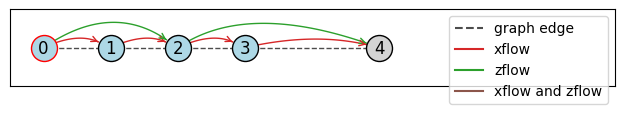

N, node = 1
N, node = 2
E, nodes = (0, 1)
E, nodes = (1, 2)
M, node = 0, plane = Plane.XY, angle(pi) = 0.0, s_domain = set(), t_domain = set()
M, node = 1, plane = Plane.XY, angle(pi) = -0.0, s_domain = {0}, t_domain = set()
X byproduct, node = 2, domain = {1}
Z byproduct, node = 2, domain = {0}
N, node = 3
N, node = 4
E, nodes = (2, 3)
E, nodes = (3, 4)
M, node = 2, plane = Plane.XY, angle(pi) = 0.0, s_domain = set(), t_domain = set()
M, node = 3, plane = Plane.XY, angle(pi) = -0.0, s_domain = {2}, t_domain = set()
X byproduct, node = 4, domain = {3}
Z byproduct, node = 4, domain = {2}


In [684]:
x1 = 0 #0->3 for 00,01,10,11
x2 = 0

circuit = Circuit(1)
circuit.rx(0,x1*np.pi/2)
circuit.rx(0,x2*np.pi/2)

pattern = circuit.transpile().pattern
# pattern.standardize()
# pattern.shift_signals()
pattern.draw_graph()
pattern.print_pattern()

# print(graph.gflow.flow_from_pattern(pattern))
# print(graph.gflow.gflow_from_pattern(pattern))
# print(graph.gflow.pauliflow_from_pattern(pattern))

No flow or gflow detected in the graph.


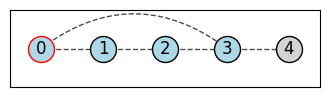

N, node = 1
N, node = 2
N, node = 3
N, node = 4
E, nodes = (0, 3)
E, nodes = (0, 1)
E, nodes = (1, 2)
E, nodes = (2, 3)
E, nodes = (3, 4)
M, node = 0, plane = Plane.XY, angle(pi) = 0.0, s_domain = set(), t_domain = set()
M, node = 1, plane = Plane.XY, angle(pi) = -1.0, s_domain = {0}, t_domain = set()
M, node = 2, plane = Plane.XY, angle(pi) = 0.0, s_domain = {1}, t_domain = set()
M, node = 3, plane = Plane.XY, angle(pi) = -1.0, s_domain = {0, 2}, t_domain = set()
X byproduct, node = 4, domain = {1, 3}
Z byproduct, node = 4, domain = {0, 2}


In [678]:
x1 = 2 #0->3 for 00,01,10,11
x2 = 2

circuit = Circuit(1)
circuit.rx(0,x1*np.pi/2)
circuit.rx(0,x2*np.pi/2)

pattern = circuit.transpile().pattern
pattern.standardize()
pat_list = list(pattern)
pat_list.insert(4,graph.command.E(nodes=(0,3)))
pattern = graph.pattern.Pattern(input_nodes=[0])
pattern.extend(pat_list)
pattern.standardize()
pattern.shift_signals()
pattern.draw_graph(flow_from_pattern=False)
pattern.print_pattern()

In [643]:
def run_pattern_normal(x1,x2,x3,loop=False):
    circuit = Circuit(1)
    circuit.rx(0,x1*np.pi/2)
    circuit.rx(0,x2*np.pi/2)
    circuit.rx(0,x3*np.pi/2)
    pattern = circuit.transpile().pattern
    pattern.standardize()

    if loop:
        pat_list = list(pattern)
        pat_list.insert(6,graph.command.E(nodes=(0,3)))
        pattern = graph.pattern.Pattern(input_nodes=[0])
        pattern.extend(pat_list)
        pattern.standardize()

    res = pattern.simulate_pattern(input_state=graph.states.PlanarState(plane=graph.pauli.Plane.XZ, angle=0.0)).psi
    p0 = np.round(np.abs(res[0])**2,decimals=4)
    p1 = np.round(np.abs(res[1])**2,decimals=4)
    
    if p0==1:
        return 0
    elif p1==1:
        return 1
    else:
        return 'x'

In [644]:
no_loop = []
loop = []
for x1 in range(4):
    for x2 in range(4):
        for x3 in range(4):
            no_loop.append(run_pattern_normal(x1,x2,x3))
            loop.append(run_pattern_normal(x1,x2,x3,loop=True))
print(hamming_distance(no_loop,quant_dist))
print(hamming_distance(no_loop,loop))

0
0


Flow detected in the graph.


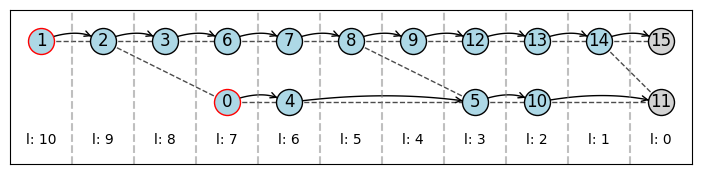

In [471]:
x1 = 2 #0->3 for 00,01,10,11
x2 = 2
x3 = 2
x4 = 2
x5 = 2
x6 = 2

circuit = Circuit(2)
circuit.cnot(0,1)
circuit.rx(0,x1*np.pi/2)
circuit.rx(1,x2*np.pi/2)
circuit.cnot(0,1)
circuit.rx(0,x3*np.pi/2)
circuit.rx(1,x4*np.pi/2)
circuit.cnot(0,1)

pattern = circuit.transpile().pattern
pattern.standardize()
pattern.shift_signals()
pattern.draw_graph(flow_from_pattern=False)
# pattern.print_pattern()

<h2>FLOW</h2>

(None, None)

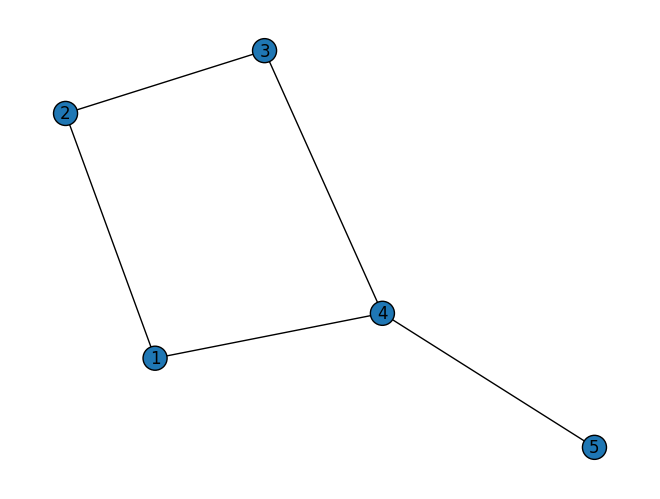

In [ ]:
n = 4
my_nodes = list(np.arange(1,n+2))
my_edges = [(1,2),(2,3),(3,4),(4,5),(1,4)]

gs = graph.graphsim.GraphState(nodes=my_nodes,edges=my_edges)
planes = {}
angles = {}
for n in my_nodes:
    planes[n] = graph.pauli.Plane.XY
    angles[n] = 0.0
gs.draw()
graph.gflow.find_pauliflow(gs.graph,iset=set([1]),oset=set([5]),meas_planes=planes,meas_angles=angles)

The pattern is not consistent with flow or gflow structure.


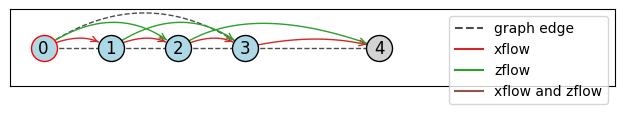

array([0.5+0.5j, 0.5-0.5j])

In [568]:
x1 = 0
x2 = 3

pattern = graph.pattern.Pattern([0])
for i in range(1,5):
    pattern.add(graph.command.N(node=i))

pattern.add(graph.command.E(nodes=(0,1)))
pattern.add(graph.command.E(nodes=(1,2)))
pattern.add(graph.command.E(nodes=(2,3)))
pattern.add(graph.command.E(nodes=(3,4)))
pattern.add(graph.command.E(nodes=(0,3)))

pattern.add(graph.command.M(node=0, angle=0))
pattern.add(graph.command.X(node=1,domain=[0]))
pattern.add(graph.command.Z(node=2,domain=[0]))

pattern.add(graph.command.M(node=1,angle=x1/2))
pattern.add(graph.command.X(node=2,domain=[1]))
pattern.add(graph.command.Z(node=3,domain=[1]))

pattern.add(graph.command.M(node=2,angle=0))
pattern.add(graph.command.X(node=3,domain=[2]))
pattern.add(graph.command.Z(node=4,domain=[2]))

pattern.add(graph.command.M(node=3,angle=x2/2))
pattern.add(graph.command.X(node=4,domain=[3]))

# pattern.standardize()

pattern.draw_graph()
# pattern.print_pattern()

pattern.simulate_pattern(input_state=graph.states.PlanarState(plane=graph.pauli.Plane.XZ, angle=0.0)).psi

In [673]:
def run_pattern_rough_psi(x1,x2,x3,loop=False):
    pattern = graph.pattern.Pattern([0])
    for i in range(1,7):
        pattern.add(graph.command.N(node=i))

    pattern.add(graph.command.E(nodes=(0,1)))
    pattern.add(graph.command.E(nodes=(1,2)))
    pattern.add(graph.command.E(nodes=(2,3)))
    pattern.add(graph.command.E(nodes=(3,4)))
    pattern.add(graph.command.E(nodes=(4,5)))
    pattern.add(graph.command.E(nodes=(5,6)))

    if loop:
        pattern.add(graph.command.E(nodes=(0,5)))

    pattern.add(graph.command.M(node=0, angle=0))
    pattern.add(graph.command.X(node=1,domain=[0]))
    pattern.add(graph.command.Z(node=2,domain=[0]))

    pattern.add(graph.command.M(node=1,angle=x1/2))
    pattern.add(graph.command.X(node=2,domain=[1]))
    pattern.add(graph.command.Z(node=3,domain=[1]))

    pattern.add(graph.command.M(node=2,angle=0))
    pattern.add(graph.command.X(node=3,domain=[2]))
    pattern.add(graph.command.Z(node=4,domain=[2]))

    pattern.add(graph.command.M(node=3,angle=x2/2))
    pattern.add(graph.command.X(node=4,domain=[3]))
    pattern.add(graph.command.Z(node=5,domain=[3]))

    pattern.add(graph.command.M(node=4,angle=0))
    pattern.add(graph.command.X(node=5,domain=[4]))
    pattern.add(graph.command.Z(node=6,domain=[4]))

    pattern.add(graph.command.M(node=5,angle=x3/2))
    pattern.add(graph.command.X(node=6,domain=[5]))

    res = pattern.simulate_pattern(input_state=graph.states.PlanarState(plane=graph.pauli.Plane.XZ, angle=0.0)).psi
    p0 = np.round(np.abs(res[0])**2,decimals=4)
    p1 = np.round(np.abs(res[1])**2,decimals=4)

    return res

def run_pattern_rough(x1,x2,x3,loop=False):
    pattern = graph.pattern.Pattern([0])
    for i in range(1,7):
        pattern.add(graph.command.N(node=i))

    pattern.add(graph.command.E(nodes=(0,1)))
    pattern.add(graph.command.E(nodes=(1,2)))
    pattern.add(graph.command.E(nodes=(2,3)))
    pattern.add(graph.command.E(nodes=(3,4)))
    pattern.add(graph.command.E(nodes=(4,5)))
    pattern.add(graph.command.E(nodes=(5,6)))

    if loop:
        pattern.add(graph.command.E(nodes=(0,5)))

    pattern.add(graph.command.M(node=0, angle=0))
    pattern.add(graph.command.X(node=1,domain=[0]))
    pattern.add(graph.command.Z(node=2,domain=[0]))

    pattern.add(graph.command.M(node=1,angle=x1/2))
    pattern.add(graph.command.X(node=2,domain=[1]))
    pattern.add(graph.command.Z(node=3,domain=[1]))

    pattern.add(graph.command.M(node=2,angle=0))
    pattern.add(graph.command.X(node=3,domain=[2]))
    pattern.add(graph.command.Z(node=4,domain=[2]))

    pattern.add(graph.command.M(node=3,angle=x2/2))
    pattern.add(graph.command.X(node=4,domain=[3]))
    pattern.add(graph.command.Z(node=5,domain=[3]))

    pattern.add(graph.command.M(node=4,angle=0))
    pattern.add(graph.command.X(node=5,domain=[4]))
    pattern.add(graph.command.Z(node=6,domain=[4]))

    pattern.add(graph.command.M(node=5,angle=x3/2))
    pattern.add(graph.command.X(node=6,domain=[5]))

    res = pattern.simulate_pattern(input_state=graph.states.PlanarState(plane=graph.pauli.Plane.XZ, angle=0.0)).psi
    p0 = np.round(np.abs(res[0])**2,decimals=4)
    p1 = np.round(np.abs(res[1])**2,decimals=4)

    if p0==1:
        return 0
    elif p1==1:
        return 1
    else:
        return 'x'

In [674]:
for x1 in range(4):
    for x2 in range(4):
        for x3 in range(4):
            print(np.linalg.norm(run_pattern_rough_psi(x1,x2,x3) - run_pattern_rough_psi(x1,x2,x3,loop=True)))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5700924586837752e-16
1.1775693440128312e-16
0.0
0.0
1.1775693440128314e-16
0.0
1.1775693440128314e-16
0.0
0.0
1.1775693440128312e-16
0.0
1.1775693440128312e-16
0.0
0.0
1.1775693440128317e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.972611193684198e-32
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [645]:
d1 = []
d2 = []
d3 = []
d4 = []
for x1 in range(4):
    for x2 in range(4):
        for x3 in range(4):
            d1.append(run_pattern_normal(x1,x2,x3))
            d2.append(run_pattern_rough(x1,x2,x3))
            d3.append(run_pattern_rough(x1,x2,x3,loop=True))
            d4.append(run_pattern_normal(x1,x2,x3,loop=True))
print(hamming_distance(d1,d2))
print(hamming_distance(d2,d3))
print(hamming_distance(d2,d4))

0
0
0


In [667]:
def run_pattern_rough_continuous_psi(x1,x2,x3,loop=False):
    pattern = graph.pattern.Pattern([0])
    for i in range(1,7):
        pattern.add(graph.command.N(node=i))

    pattern.add(graph.command.E(nodes=(0,1)))
    pattern.add(graph.command.E(nodes=(1,2)))
    pattern.add(graph.command.E(nodes=(2,3)))
    pattern.add(graph.command.E(nodes=(3,4)))
    pattern.add(graph.command.E(nodes=(4,5)))
    pattern.add(graph.command.E(nodes=(5,6)))

    if loop:
        pattern.add(graph.command.E(nodes=(0,5)))

    pattern.add(graph.command.M(node=0, angle=0))
    pattern.add(graph.command.X(node=1,domain=[0]))
    pattern.add(graph.command.Z(node=2,domain=[0]))

    pattern.add(graph.command.M(node=1,angle=x1/np.pi))
    pattern.add(graph.command.X(node=2,domain=[1]))
    pattern.add(graph.command.Z(node=3,domain=[1]))

    pattern.add(graph.command.M(node=2,angle=0))
    pattern.add(graph.command.X(node=3,domain=[2]))
    pattern.add(graph.command.Z(node=4,domain=[2]))

    pattern.add(graph.command.M(node=3,angle=x2/np.pi))
    pattern.add(graph.command.X(node=4,domain=[3]))
    pattern.add(graph.command.Z(node=5,domain=[3]))

    pattern.add(graph.command.M(node=4,angle=0))
    pattern.add(graph.command.X(node=5,domain=[4]))
    pattern.add(graph.command.Z(node=6,domain=[4]))

    pattern.add(graph.command.M(node=5,angle=x3/np.pi))
    pattern.add(graph.command.X(node=6,domain=[5]))

    res = pattern.simulate_pattern(input_state=graph.states.PlanarState(plane=graph.pauli.Plane.XZ, angle=0.6)).psi
    p0 = np.round(np.abs(res[0])**2,decimals=4)
    p1 = np.round(np.abs(res[1])**2,decimals=4)

    return res

for i in range(30):
    x1,x2,x3 = np.random.uniform(0,2*np.pi,size=3)
    print(np.linalg.norm(run_pattern_rough_continuous_psi(x1,x2,x3,loop=False) - run_pattern_rough_continuous_psi(x1,x2,x3,loop=True)))
    print(run_pattern_rough_continuous_psi(x1,x2,x3,loop=False))
    print(run_pattern_rough_continuous_psi(x1,x2,x3,loop=True))

0.29887626494719854
[0.64201779-0.32949078j 0.60883891+0.32949078j]
[0.52514251-0.49936745j 0.47485749+0.49936745j]
0.2988762649471985
[0.83723258+0.25293942j 0.41362412-0.25293942j]
[0.82100486+0.38334825j 0.17899514-0.38334825j]
0.29887626494719866
[0.31008138+0.09693126j 0.94077532-0.09693126j]
[0.02206852+0.14690644j 0.97793148-0.14690644j]
0.2988762649471986
[0.53684105+0.31779187j 0.71401565-0.31779187j]
[0.36573944+0.4816369j 0.63426056-0.4816369j]
0.29887626494719854
[0.42654548-0.26322041j 0.82431122+0.26322041j]
[0.19857841-0.39892985j 0.80142159+0.39892985j]
0.29887626494719843
[0.30117721-0.06083241j 0.94967948+0.06083241j]
[0.00857361-0.09219598j 0.99142639+0.09219598j]
0.2988762649471986
[0.9005701-0.18203406j 0.3502866+0.18203406j]
[0.91699752-0.27588597j 0.08300248+0.27588597j]
0.29887626494719854
[0.29883833+0.0466727j 0.95201837-0.0466727j]
[0.00502886+0.0707359j 0.99497114-0.0707359j]
0.2988762649471984
[0.85930135-0.23268606j 0.39155535+0.23268606j]
[0.85445169-0.35